In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("/content/netflix_titles.csv")

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
df.shape

(8807, 12)

In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
missing_values=df.isnull().sum()
missing_values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
percentage_missing = (missing_values / len(df)) * 100
percentage_missing

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [10]:
missing_data_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage Missing': percentage_missing})
missing_data_summary

,Missing Values,Percentage Missing
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,2634,29.908028
cast,825,9.367549
country,831,9.435676
date_added,10,0.113546
release_year,0,0.000000
rating,4,0.045418
duration,3,0.034064


In [11]:
mode_value = df['duration'].mode()[0]
df['rating'].fillna(mode_value, inplace=True)

In [12]:
mode_value2 = df['duration'].mode()[0]
df['rating'].fillna(mode_value2, inplace=True)

In [13]:
df['director']=df['director'].fillna('No Data Available')
df['cast']=df['cast'].fillna('No Data Available')
df['country']=df['country'].fillna(df['country'].mode()[0])
df['date_added']=df['date_added'].fillna(df['date_added'].mode()[0])

In [14]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [15]:
# Iterate through all columns and print unique values
for column_name in df.columns:
    unique_values_count = df[column_name].nunique()
    print(f'Column: {column_name}')
    print('Unique Values:', unique_values_count)
    print('-' * 40)

Column: show_id
Unique Values: 8807
----------------------------------------
Column: type
Unique Values: 2
----------------------------------------
Column: title
Unique Values: 8807
----------------------------------------
Column: director
Unique Values: 4529
----------------------------------------
Column: cast
Unique Values: 7693
----------------------------------------
Column: country
Unique Values: 748
----------------------------------------
Column: date_added
Unique Values: 1767
----------------------------------------
Column: release_year
Unique Values: 74
----------------------------------------
Column: rating
Unique Values: 18
----------------------------------------
Column: duration
Unique Values: 220
----------------------------------------
Column: listed_in
Unique Values: 514
----------------------------------------
Column: description
Unique Values: 8775
----------------------------------------


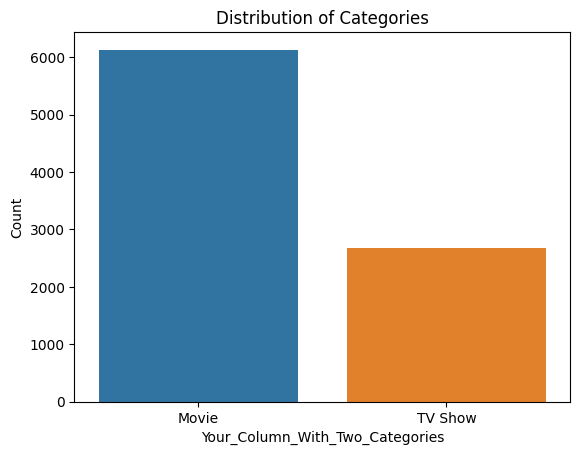

In [16]:
# Create a countplot for the column with two categories
sns.countplot(x='type', data=df)
plt.xlabel('Your_Column_With_Two_Categories')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()

In [17]:
# Use value_counts() to count unique values
value_counts = df['type'].value_counts()

# Display the counts
print(value_counts)

Movie      6131
TV Show    2676
Name: type, dtype: int64


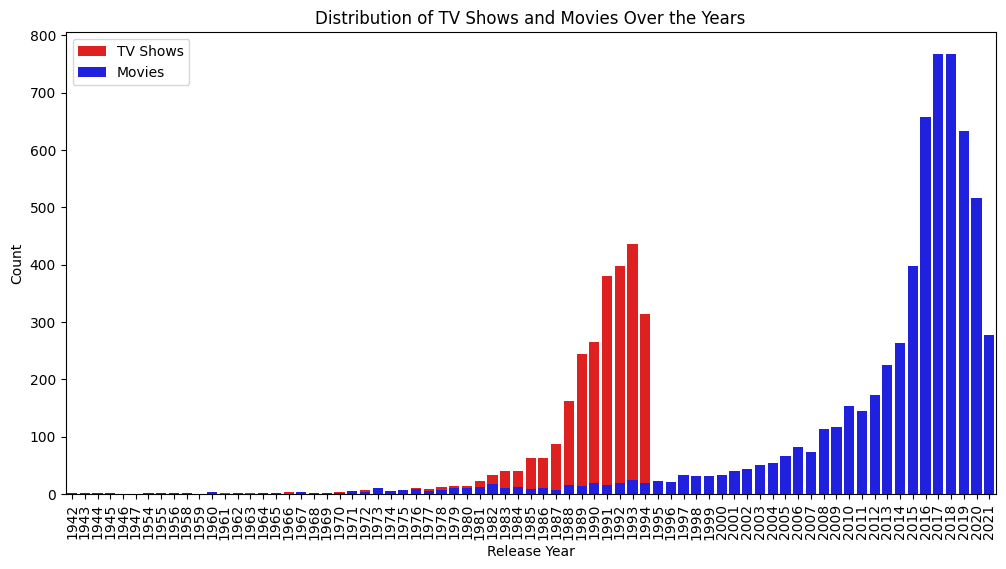

In [18]:
# Assuming you have a DataFrame df
# Filter the DataFrame to separate TV shows and movies
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']

# Create countplots for TV shows and movies over the years
plt.figure(figsize=(12, 6))  # Set the figure size
sns.countplot(x='release_year', data=tv_shows, color='red', label='TV Shows')
sns.countplot(x='release_year', data=movies, color='blue', label='Movies')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of TV Shows and Movies Over the Years')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()
plt.show()


In [19]:

# Filter the DataFrame to separate TV shows and movies
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']

# Group and count TV shows and movies by release year
tv_shows_count = tv_shows['release_year'].value_counts().sort_index()
movies_count = movies['release_year'].value_counts().sort_index()

# Create a new DataFrame with years as the index and counts as columns
yearly_counts = pd.DataFrame({'TV Shows': tv_shows_count, 'Movies': movies_count})
yearly_counts.fillna(0, inplace=True)  # Fill missing values with 0

# Display the counts for TV shows and movies year by year
print(yearly_counts)


      TV Shows  Movies
1925       1.0     0.0
1942       0.0     2.0
1943       0.0     3.0
1944       0.0     3.0
1945       1.0     3.0
...        ...     ...
2017     265.0   767.0
2018     380.0   767.0
2019     397.0   633.0
2020     436.0   517.0
2021     315.0   277.0

[74 rows x 2 columns]


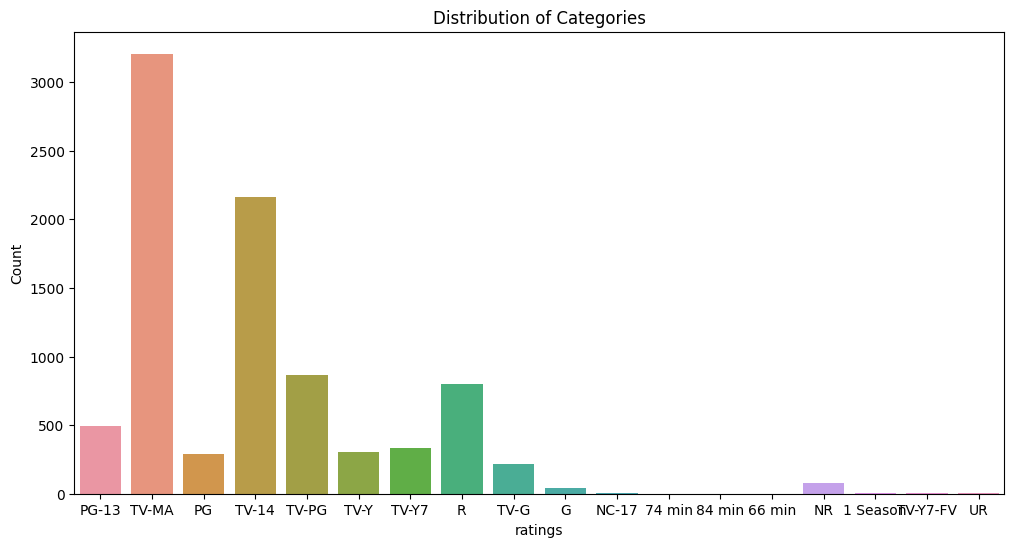

In [20]:
# Create a countplot for the column with two categories
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', data=df)
plt.xlabel('ratings')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()

In [21]:
# Use value_counts() to count unique values
value_counts = df['rating'].value_counts()

# Display the counts
print(value_counts)

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
1 Season       4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64


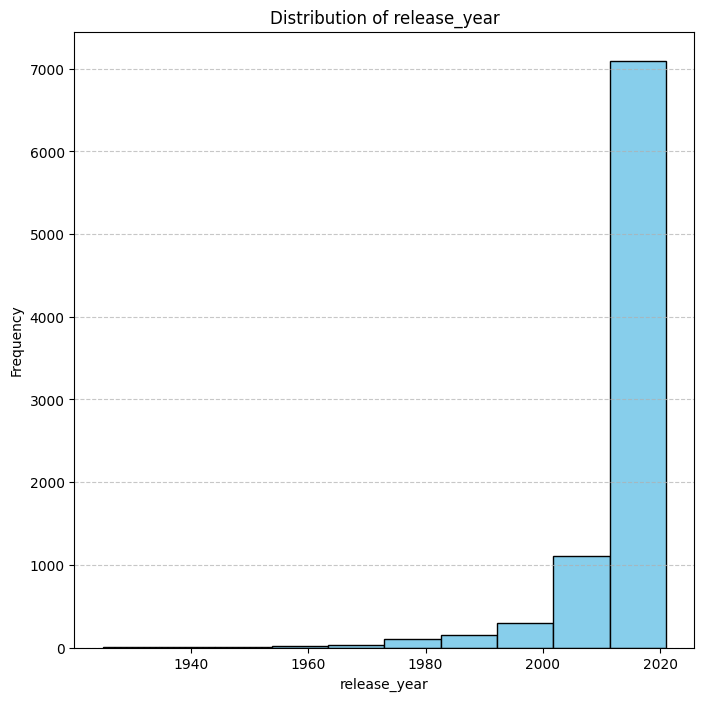

In [22]:
#numeric_columns = df.select_dtypes(include=['int64', 'float64'])  # Select numeric columns

# Loop through numeric columns and create histograms
#for column in numeric_columns.columns:

plt.figure(figsize=(8, 8))  # Set the figure size
plt.hist(df['release_year'], bins=10, color='skyblue', edgecolor='black')  # Create histogram
plt.title(f'Distribution of release_year')  # Set the title
plt.xlabel('release_year')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()  # Show the histogram

In [23]:
mean_release_year = df['release_year'].mean()
median_release_year = df['release_year'].median()
std_deviation_release_year = df['release_year'].std()

print(f'Mean Release Year: {mean_release_year:.2f}')
print(f'Median Release Year: {median_release_year}')
print(f'Standard Deviation of Release Year: {std_deviation_release_year:.2f}')



Mean Release Year: 2014.18
Median Release Year: 2017.0
Standard Deviation of Release Year: 8.82


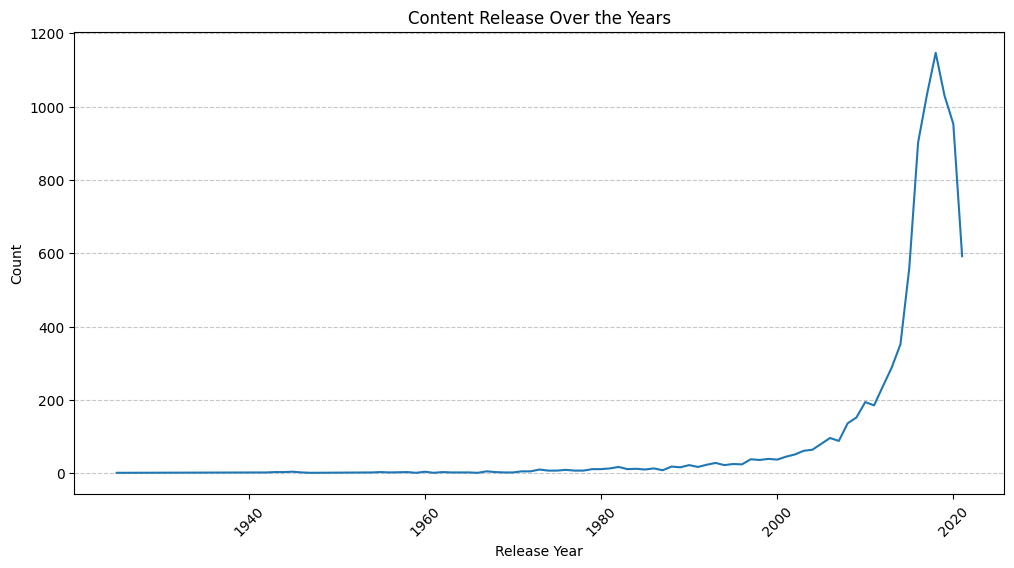

In [24]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='count', data=df['release_year'].value_counts().reset_index().rename(columns={'index': 'release_year', 'release_year': 'count'}))
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Content Release Over the Years')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


In [25]:
yearly_counts = df['release_year'].value_counts().sort_index().reset_index()
yearly_counts.columns = ['Year', 'Count']
yearly_counts

,Year,Count
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1032
70,2018,1147
71,2019,1030
72,2020,953


In [26]:
# Split the DataFrame based on the 'type' column
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']


In [27]:
movies_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data Available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [28]:
tv_shows_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Data Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data Available,No Data Available,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,No Data Available,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,No Data Available,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,No Data Available,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,No Data Available,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [29]:
# Remove 'min' and convert to integer
movies_df['duration'] = pd.to_numeric(movies_df['duration'].str.replace(' min', ''), errors='coerce')

# Check the data types after conversion
print(movies_df.dtypes)

show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
duration        float64
listed_in        object
description      object
dtype: object


<ipython-input-29-22cda524c73b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration'] = pd.to_numeric(movies_df['duration'].str.replace(' min', ''), errors='coerce')


In [30]:
#average duration of movies
average_mov_duration = movies_df['duration'].mean()
average_mov_duration

99.57718668407311

In [31]:
tv_shows_duration=tv_shows_df['duration'].mode()
tv_shows_duration

0    1 Season
Name: duration, dtype: object

In [32]:
value_counts = tv_shows_df['duration'].value_counts()
value_counts

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

In [33]:
# Split the 'cast' column into a list of actors and explode the list to separate rows
df['cast'] = df['cast'].str.split(', ')
df_cast = df.explode('cast')
df_cast

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data Available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data Available,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,No Data Available,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,No Data Available,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,No Data Available,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [34]:
df['cast'] = df['cast'].astype(str)

# Split the 'cast' column into a list of actors and explode the list to separate rows
df['cast'] = df['cast'].str.split(', ')
df = df.explode('cast')

# Count the occurrences of each actor
actor_counts = df['cast'].value_counts()

# Display the most prolific actors
print("Most Prolific Actors:")
print(actor_counts.head(25))

Most Prolific Actors:
['No Data Available']     825
'Anupam Kher'              37
'Rupa Bhimani'             31
'Takahiro Sakurai'         29
'Julie Tejwani'            28
'Om Puri'                  27
['Shah Rukh Khan'          26
'Paresh Rawal'             25
'Andrea Libman'            24
['Akshay Kumar'            23
'Jigna Bhardwaj'           23
'Yuki Kaji'                22
'Vincent Tong'             22
'Rajesh Kava'              22
'Junichi Suwabe'           20
['Amitabh Bachchan'        20
'Kareena Kapoor'           20
['David Attenborough']     19
'Fred Tatasciore'          19
['Adam Sandler'            19
'Boman Irani'              19
'Ai Kayano'                18
'Yashpal Sharma'           18
['Vatsal Dubey'            18
'Daisuke Ono'              17
Name: cast, dtype: int64


In [35]:
# Count the occurrences of each director
director_counts = df['director'].value_counts()

# Count the occurrences of each actor
actor_counts = df['cast'].value_counts()

# Display the most prolific directors and actors
print("Most Prolific Directors:")
print(director_counts.head(25))

Most Prolific Directors:
No Data Available      19013
Martin Scorsese          139
Cathy Garcia-Molina      125
Rajiv Chilaka            121
Steven Spielberg         121
Youssef Chahine          104
Quentin Tarantino         94
Robert Rodriguez          92
David Dhawan              90
Don Michael Paul          88
McG                       88
Kunle Afolayan            87
Yılmaz Erdoğan            75
Clint Eastwood            75
Toshiya Shinohara         68
Noah Baumbach             67
Mae Czarina Cruz          66
Suhas Kadav               65
Fernando Ayllón           63
Ron Howard                63
David Fincher             61
Robert Luketic            61
Sooraj R. Barjatya        60
Hakan Algül               60
Ram Gopal Varma           59
Name: director, dtype: int64


In [36]:
# Count the occurrences of each country
country_counts = df['country'].value_counts()

# Display the top producing countries
print("Top Producing Countries:")
print(country_counts.head(10))

Top Producing Countries:
United States     24982
India              7246
Japan              2751
United Kingdom     2126
South Korea        1478
Canada             1278
Spain              1239
Mexico              933
Turkey              923
Nigeria             852
Name: country, dtype: int64


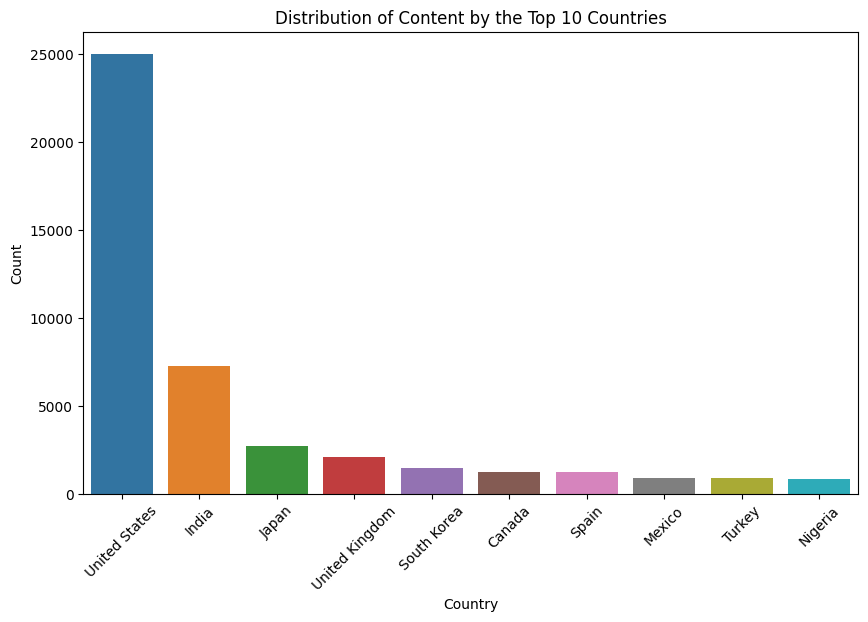

In [37]:
country_counts = df['country'].value_counts()

# Select the top 10 countries by count
top_10_countries = country_counts.head(10)

# Create a countplot to visualize the distribution of content by the top 10 countries
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=df, order=top_10_countries.index)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Content by the Top 10 Countries')
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


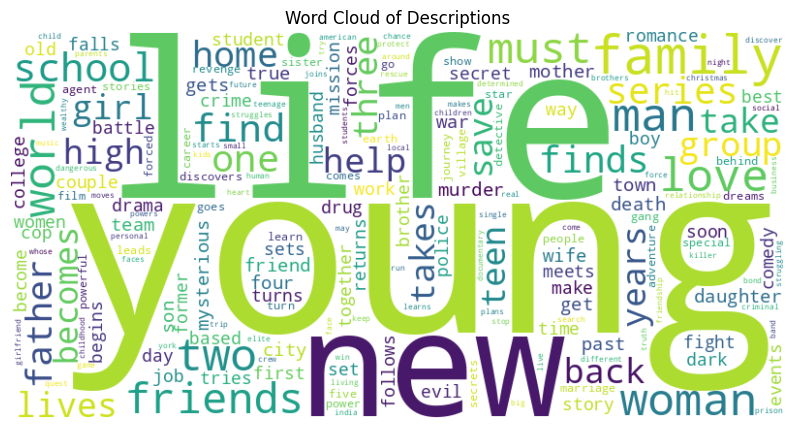

In [38]:

import nltk
from wordcloud import WordCloud

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Tokenization and stopwords removal
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
df['description'] = df['description'].str.lower()
df['description'] = df['description'].apply(lambda x: [word for word in word_tokenize(x) if word.isalnum() and word not in stop_words])

# Count the frequency of each word
word_freq = Counter(word for words in df['description'] for word in words)

# Word cloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions')
plt.show()




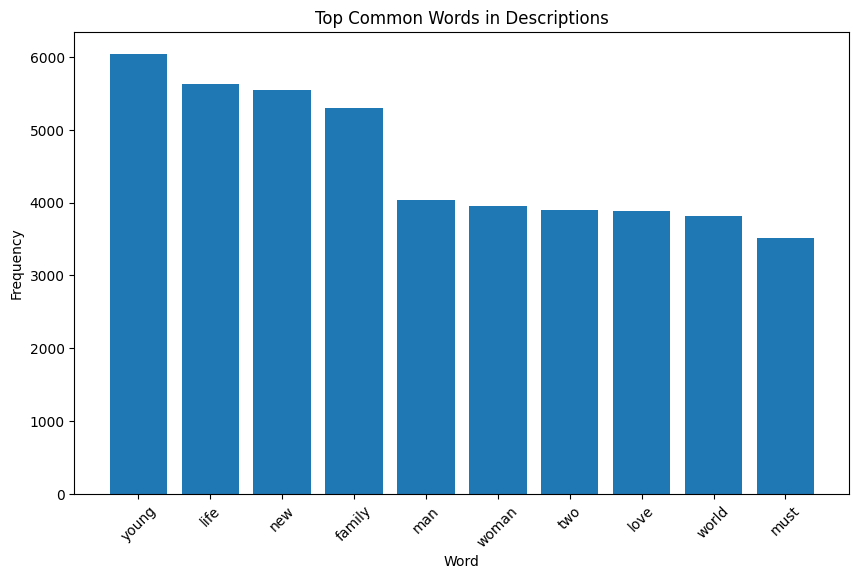

In [39]:
# Frequency histogram visualization
top_common_words = word_freq.most_common(10)

plt.figure(figsize=(10, 6))
plt.bar(*zip(*top_common_words))
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top Common Words in Descriptions')
plt.xticks(rotation=45)
plt.show()

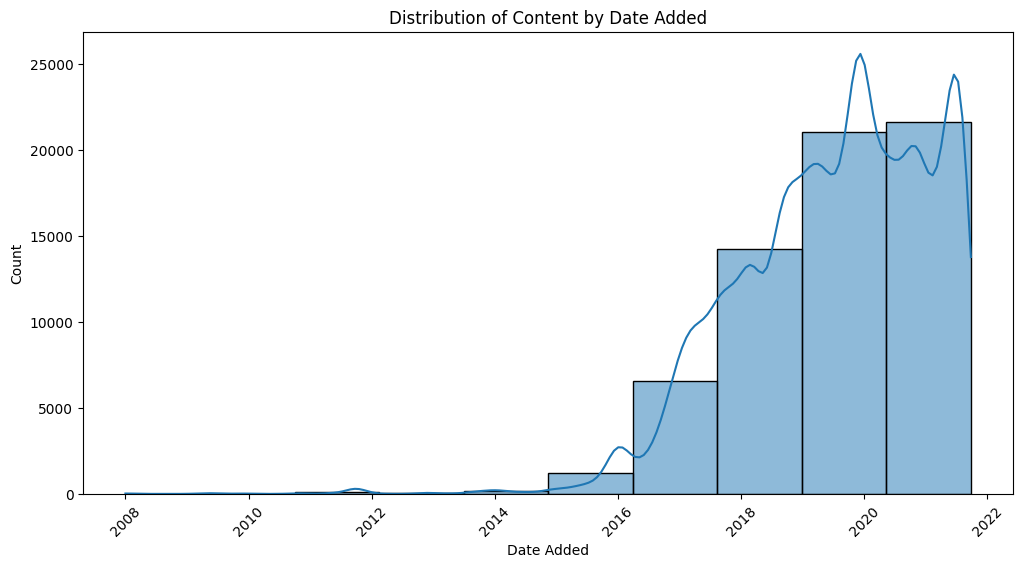

In [40]:
df['date_added'] = df['date_added'].str.strip()

# Convert 'date_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

# EDA: Distribution of content by date
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='date_added', bins=10, kde=True)
plt.xlabel('Date Added')
plt.ylabel('Count')
plt.title('Distribution of Content by Date Added')
plt.xticks(rotation=45)
plt.show()

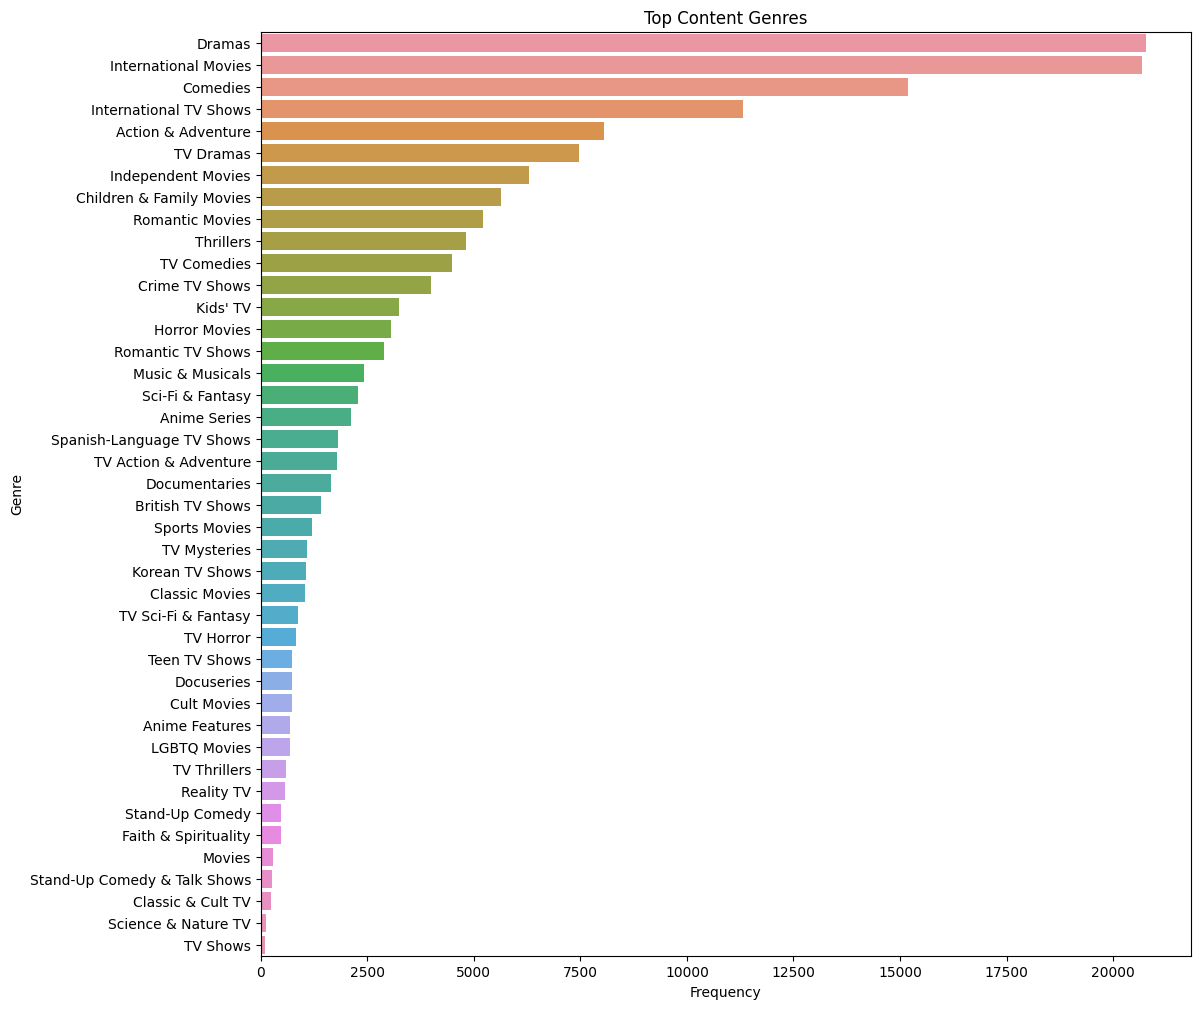

In [41]:

# Genre Frequency Analysis
genre_counts = df['listed_in'].str.split(', ').explode().value_counts()

plt.figure(figsize=(12, 12))
sns.barplot(x=genre_counts.values, y=genre_counts.index, orient='h')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.title('Top Content Genres')
plt.show()



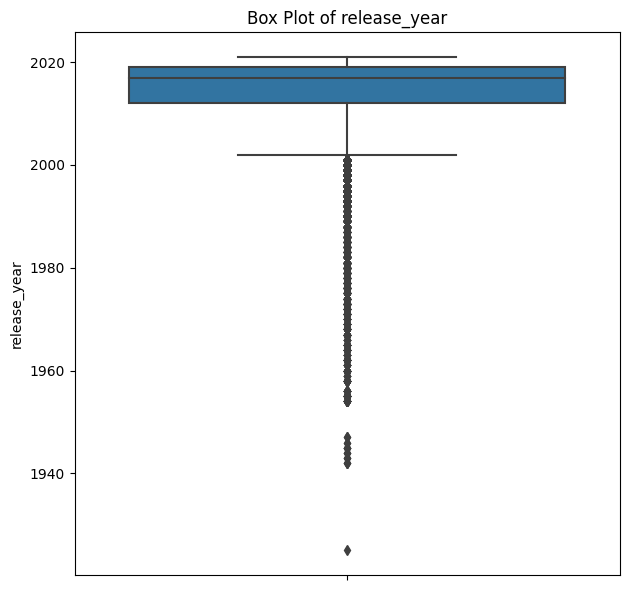

       release_year
count  64951.000000
mean    2013.637419
std        8.924462
min     1925.000000
25%     2012.000000
50%     2017.000000
75%     2019.000000
max     2021.000000
Number of outliers: 0


In [42]:


# Numeric features to analyze
numeric_features = ['release_year']

# Box plots to visualize outliers
plt.figure(figsize=(12, 6))
for feature in numeric_features:
    plt.subplot(1, 2, numeric_features.index(feature) + 1)
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# Summary statistics
summary_stats = df[numeric_features].describe()

# Z-score method to detect outliers
from scipy import stats
z_scores = stats.zscore(df[numeric_features])
outliers = (z_scores > 3).any(axis=1)

# Print summary statistics and identify outliers
print(summary_stats)
print("Number of outliers:", outliers.sum())
